In [3]:
#!pip install tensorflow==2.12.1 
#!pip install pillow
#!pip install h5py
#!pip install matplotlib
!pip show tensorflow

Name: tensorflow
Version: 2.12.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\Computer\anaconda3\envs\DPMLpy311\Lib\site-packages
Requires: tensorflow-intel
Required-by: 


In [16]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Отключаем научную нотацию
np.set_printoptions(suppress=True)

In [18]:
# Загружаем предварительно обученную модель из файла
model = load_model("keras_model.h5", compile=False)

In [19]:
# Загружаем названия классов
with open("labels.txt", "r", encoding="utf-8") as f:
    class_names = f.readlines()

In [20]:
# Создаём массив нужной формы для подачи изображения в модель 
# (1, 224, 224, 3) — картинка размером 224x224 пикселя и 3 цветовых канала (RGB)
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [21]:
# Конвертируем изображение в RGB
image = Image.open(r"C:/Users/Computer/Desktop/Lab1ML/Cats/Cat.jpg").convert("RGB")
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
# Преобразование в numpy-массив:
image_array = np.asarray(image)
# Приводим значения пикселей из диапазона [0, 255] к [-1, 1]:
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
# Записываем обработанное изображение в первый элемент массива data
data[0] = normalized_image_array

In [22]:
# Выполняем предсказание модели
prediction = model.predict(data)

1/1 [==============================] - 1s 583ms/step


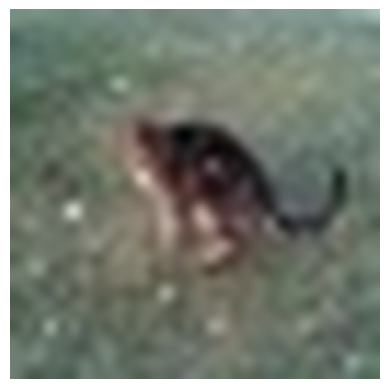

Класс: Cats
Уверенность: 1.0


In [23]:
# Отображение изображения
plt.imshow(image)
plt.axis('off') # Убираем подписи осей (делаем картинку чистой, без цифр по краям).
plt.show()
# Определение предсказанного класса
index = np.argmax(prediction)
# Получаем название класса по индексу
class_name = class_names[index]
# Извлечение уверенности модели
confidence_score = prediction[0][index]
print("Класс:", class_name[2:], end="") 
print("Уверенность:", confidence_score)

In [24]:
# Конвертируем изображение в RGB
image = Image.open(r"C:/Users/Computer/Desktop/Lab1ML/Dogs/Dog.jpg").convert("RGB")
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
# Преобразование в numpy-массив:
image_array = np.asarray(image)
# Приводим значения пикселей из диапазона [0, 255] к [-1, 1]:
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
# Записываем обработанное изображение в первый элемент массива data
data[0] = normalized_image_array

In [25]:
# Выполняем предсказание модели
prediction = model.predict(data)

1/1 [==============================] - 0s 25ms/step


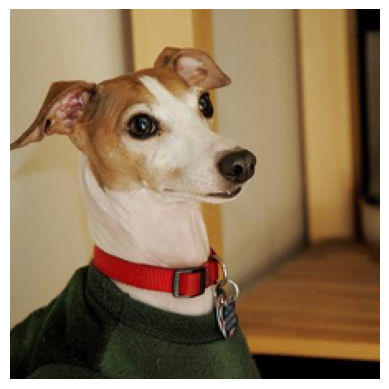

Класс: Dogs
Уверенность: 1.0


In [26]:
# Отображение изображения
plt.imshow(image)
plt.axis('off') # Убираем подписи осей (делаем картинку чистой, без цифр по краям).
plt.show()
# Определение предсказанного класса
index = np.argmax(prediction)
# Получаем название класса по индексу
class_name = class_names[index]
# Извлечение уверенности модели
confidence_score = prediction[0][index]
print("Класс:", class_name[2:], end="") 
print("Уверенность:", confidence_score)